threshold를 trackbar로 조절하여 이미지를 나타내보자

In [1]:
import numpy as np
import cv2
import cv2_plus
import random as rn

In [2]:
def nothing(x):
    pass

이미지 grayscale로 읽어오기

In [3]:
imgfile = 'images/document.jpg'
img = cv2.imread(imgfile, cv2.IMREAD_GRAYSCALE)

### Resize image

cv2.resize(img, dsize, fx, fy, interpolation)
- img : 이미지
- dsize : 가로방향 픽셀수, 세로방향 픽셀수
- fx : 가로 사이즈 배수. 해당 배수로 resizing. 2면 2배로 resizing
- fy : 세로 사이즈 배수
- interpolation : resizing 수행 시 interpolation 방법 설정

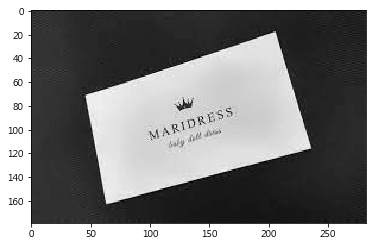

In [4]:
cv2_plus.imshow(img,img_type=0)

명함 이미지에서 인위적인 노이즈를 추가하여 필터와 threshold 알고리즘 효과 확인

In [5]:
def add_noise(img, prob):
    '''
    Add salt and pepper noise to image
    refer to https://code.i-harness.com/ko-kr/q/15dfff5
    '''
    output = np.zeros(img.shape)
    thres = 1 - prob 
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            rdn = rn.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = img[i][j]
    return output

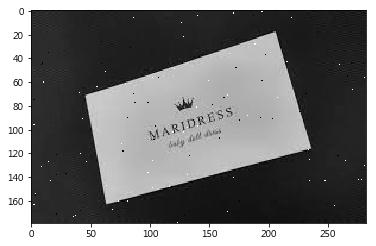

In [6]:
cv2_plus.imshow(add_noise(img, 0.001),img_type=0)

In [7]:
r = 600.0 / img.shape[0]
dim = (int(img.shape[1] * r), 600)
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

**GaussianBlur는 분산이 클수록 smoothing 효과가 증가한다.**

Gaussian Filter는 Gaussian함수를 이용한 kernel을 적용한다. Gaussian Noise(백색 노이즈)를 제거하는데 효과적이다.

cv2.GaussianBlur(img, ksize, sigmaX) : 
- img :  Chennel수 관계무, depth(Data Type)은 CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
- ksize : (ksize1, ksize2)와 같이 값을 설정가능. 단, 홀수값이어야함
- sigmaX : default값은 0. Gaussian kernel의 standart deviation 설정

In [8]:
blur1 = cv2.GaussianBlur(img, (5, 5), 0.5)
blur2 = cv2.GaussianBlur(img, (5, 5), 5)

cv2.adaptiveThreshold는 영역을 여러 개로 분할하여 threshold적용

cv2.adaptiveThreshold(img, maxValue, adaptiveMethod, thresholdType, blockSize, C)
- img : grayscale image
- maxValue : 임계값
- adaptiveMethod : thresholding value를 결정하는 계산 방법
- blockSize : thresholding 적용 영역 사이즈
- C : 보정상수. 평균 혹은 가중평균에 차감할 값. 양수이면 adaptive 문턱값에서 빼고, 음수면 더해준다. 0이면 그대로

**GaussianBlur 유무에 따른 효과**

In [9]:
no_blur = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
blur_1 = cv2.adaptiveThreshold(blur1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
blur_2 = cv2.adaptiveThreshold(blur2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)

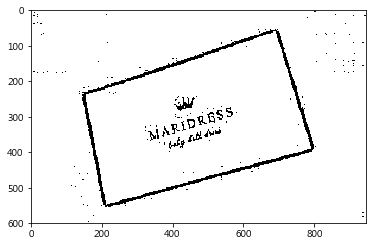

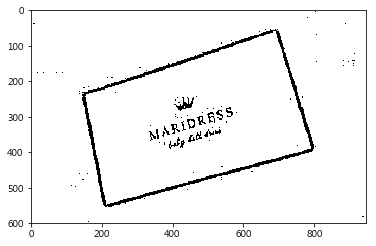

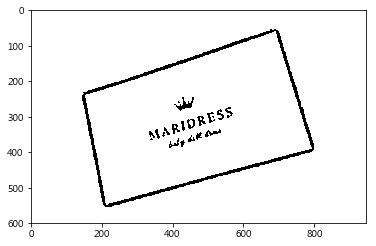

In [10]:
cv2_plus.imshow(no_blur,img_type=0)
cv2_plus.imshow(blur_1,img_type=0)
cv2_plus.imshow(blur_2,img_type=0)

**threshold에 적용 타입에따른 효과**

In [11]:
imgfile = 'images/adathresh.jpg'
img = cv2.imread(imgfile, cv2.IMREAD_GRAYSCALE)

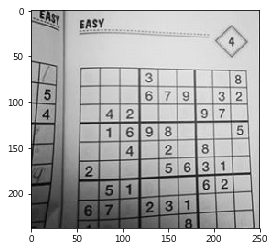

In [12]:
cv2_plus.imshow(img,img_type=0)

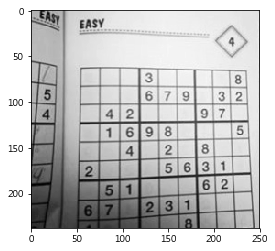

In [13]:
blur = cv2.GaussianBlur(img, (5, 5), 0.5)
cv2_plus.imshow(blur,img_type=0)

In [14]:
_, thr1 = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY)

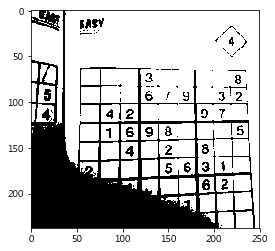

In [15]:
cv2_plus.imshow(thr1,img_type=0)

adaptivethreshold는 구역별로 나누에 계산하기 때문에 효과적

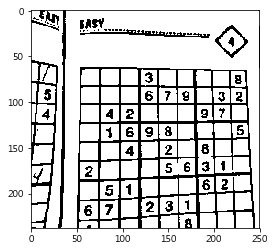

In [16]:
ada_thr = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
cv2_plus.imshow(ada_thr,img_type=0)